# **Exploring the Role of Key and BPM in Defining Music Genres**

## **Data Collection and Sources**

To conduct a comprehensive song genre analysis based on key and BPM, the foundation of our research lies in the acquisition of a substantial dataset encompassing songs and their associated attributes. For this purpose, we turned to a reliable source of music data, the Global Tzanakakis (GTZAN) dataset for Music Genre Classification. This dataset is publicly available on [Kaggle](https://medium.com/r?url=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fandradaolteanu%2Fgtzan-dataset-music-genre-classification)

These audio files are thoughtfully categorized into various music genres, including rock, pop, disco, and more. Each genre boasts a meticulously curated selection of 100 songs, each represented by a 30-second audio clip. This meticulous curation ensures that the dataset captures the essence of diverse musical styles, making it a valuable resource for our genre analysis.

## **Data Analysis Process**
The process of analysis will commence with the extraction of key and BPM data from audio sources. To accomplish this, we will employ the capabilities of Python libraries, specifically Librose and Pydub, which enable us to dissect the musical components that define a song's key and tempo.

With this vital information in hand, our exploration will then shift focus towards the BPM distribution across various music genres. This phase of the analysis aims to unveil the distinct BPM profiles that characterize each genre, shedding light on the rhythmic cadence and energy levels associated with different musical styles. This critical step will provide us with a comprehensive understanding of how tempo plays a defining role in shaping the identity of a music genre.

Subsequently, our examination will delve deeper into the intricate world of musical keys, seeking to discern the rich tapestry of tonalities within each genre. We will uncover the predominant keys that resonate within a particular genre, identifying how the emotional landscape of music is sculpted by the choice of key. This in-depth exploration will offer invaluable insights into the emotional and tonal nuances that contribute to the unique identity of various music genres. 

Now, let's start our analysis into the heart and soul of the rock genre.

## **Import Libraries**

In [4]:
# data manipulation
from pydub import AudioSegment       # Importing the AudioSegment class from the pydub library for audio manipulation
import librosa                       # Importing the librosa library for audio analysis
import numpy as np                   
import os                            
import pandas as pd                  

# visulaization
import matplotlib.pyplot as plt      # Importing the matplotlib library for creating visualizations
import seaborn as sns                # Importing the seaborn library for enhancing visualization aesthetics

import warnings
warnings.filterwarnings("ignore")    # Suppressing warning messages to keep the code clean

## **Analyzation for Each Genre**

### **Rock**

In [5]:
# Function to detect the key of an audio file
def detect_key(audio_file_path):
    y, sr = librosa.load(audio_file_path) # Load the audio file using librosa and get the audio waveform (y) and the sampling rate (sr)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_mean = chroma.mean(axis=1) # Calculate the mean chroma value along each pitch class (12 classes)
    key_index = chroma_mean.argmax() # Find the index of the maximum chroma value, which represents the detected key
    keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    detected_key = keys[key_index]
    return detected_key

# Function to get the BPM of an audio file
def get_bpm(audio_file):
    y, sr = librosa.load(audio_file)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr) # Calculate the onset strength profile to detect beats and onsets in the audio
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr) # Estimate the tempo (BPM) of the audio using the beat tracking algorithm
    return tempo

# Function to process files in a folder, including key detection
def process_files_in_folder(folder_path):
    data = {'File Name': [], 'BPM': [], 'Key': [], 'Genre': []}
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            audio_file = os.path.join(folder_path, filename) # Construct the full path of the audio file
            bpm = get_bpm(audio_file)
            key = detect_key(audio_file)

            # Append the file's information (name, BPM, key, and genre) to the data dictionary
            data['File Name'].append(filename)
            data['BPM'].append(bpm.round())
            data['Key'].append(key)
            data['Genre'].append('Rock')
    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    folder_path = "GTZAN Dataset - Music Genre Classification/Data/genres_original/rock"
    df_rock = process_files_in_folder(folder_path)

#### **BPM Distribution**

In [6]:
# typical tempo
df_rock['BPM'].mean()

120.04

In [7]:
# calculate lower and upper bounds
Q1 = df_rock['BPM'].quantile(0.25)
Q3 = df_rock['BPM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 76.5
Upper Bound: 160.5


In [8]:
df_rock.sort_values(by='BPM', ascending=False)

,File Name,BPM,Key,Genre
69,rock.00069.wav,172.0,A,Rock
42,rock.00042.wav,161.0,A,Rock
10,rock.00010.wav,161.0,D,Rock
45,rock.00045.wav,152.0,A,Rock
9,rock.00009.wav,152.0,F,Rock
...,...,...,...,...
44,rock.00044.wav,92.0,C,Rock
51,rock.00051.wav,89.0,G#,Rock
7,rock.00007.wav,89.0,G,Rock
60,rock.00060.wav,89.0,E,Rock


In [9]:
# outliers
df_rock.sort_values(by='BPM',ascending=False).head(3)

,File Name,BPM,Key,Genre
69,rock.00069.wav,172.0,A,Rock
42,rock.00042.wav,161.0,A,Rock
10,rock.00010.wav,161.0,D,Rock


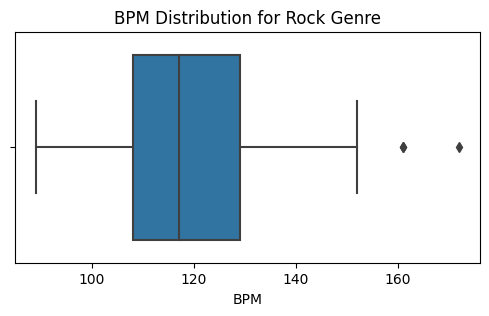

In [10]:
# box plot to visualize the distribution of BPM
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_rock, x='BPM')
plt.title("BPM Distribution for Rock Genre")
plt.show()

**Insight**

- The mean BPM for the rock songs in the dataset is 120 BPM. This could be indicative of the typical tempo range for a rock music. Using the mean to identify the typical BPM (Beats Per Minute) for a rock genre is a reasonable approach, especially if you have a limited amount of BPM data. The mean, also known as the average, is a simple and straightforward way to summarize data and get a sense of the central tendency.

- We identified three outlier data points with BPM values of 161, 161, and 172. These values significantly exceed the upper bound of 160.5 calculated using the Interquartile Range (IQR) method. Outliers in the data may indicate songs that deviate from the typical tempo associated with rock music. The three outliers are:
    * rock.00069.wav = Witches Promise by Jethro Tull
    * rock.00042.wav = D'yer Mak'er by Led Zeppelin
    * rock.00010.wav = Worthy by Ani DiFranco
    
    Identifying an outlier in a track's BPM value doesn't necessarily mean that the track is atypical based on the dataset. Outliers are data points that significantly deviate from the typical range of values in a dataset, but they can have various interpretations and may not always indicate atypicality in the context of music genres. We should consider other factors such as subgenre, artist intent, and historical context.

#### **Key Distribution**

In [11]:
# key distribution
key_rock = df_rock['Key'].value_counts().reset_index()
key_rock

,Key,count
0,A,19
1,D,14
2,C,13
3,G,12
4,F,8
5,E,8
6,D#,5
7,C#,5
8,F#,5
9,B,4


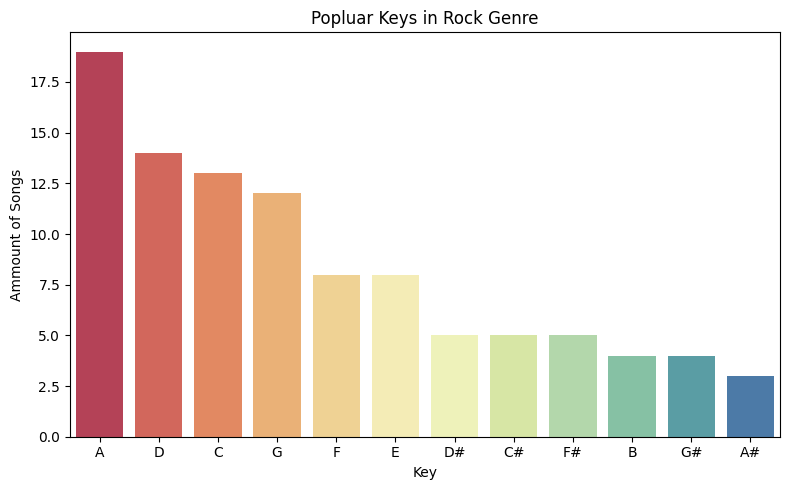

In [12]:
# bar plot to visualize the key distribution
plt.figure(figsize=(8, 5))

sns.barplot(x='Key', y='count', data=key_rock, palette='Spectral')
plt.title('Popluar Keys in Rock Genre')
plt.xlabel('Key')
plt.ylabel('Ammount of Songs')
plt.tight_layout()

plt.show()

**Insight**

- The data shows that the key of A is the most popular in the rock genre, with a count of 19 songs. Following closely, the key of D is the second most popular, with 14 songs. This suggests that the combination of the key of A and the BPM range of rock music is well-suited to the energetic and powerful sound associated with rock music.


### **Metal**

In [13]:
# Function to detect the key of an audio file
def detect_key(audio_file_path):
    y, sr = librosa.load(audio_file_path)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_mean = chroma.mean(axis=1)
    key_index = chroma_mean.argmax()
    keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    detected_key = keys[key_index]
    return detected_key

# Function to get the BPM of an audio file
def get_bpm(audio_file):
    y, sr = librosa.load(audio_file)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    return tempo

# Function to process files in a folder, including key detection
def process_files_in_folder(folder_path):
    data = {'File Name': [], 'BPM': [], 'Key': [], 'Genre': []}
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            audio_file = os.path.join(folder_path, filename)
            bpm = get_bpm(audio_file)
            key = detect_key(audio_file)

            data['File Name'].append(filename)
            data['BPM'].append(bpm.round())
            data['Key'].append(key)
            data['Genre'].append('Metal')

    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    folder_path = "GTZAN Dataset - Music Genre Classification/Data/genres_original/metal"
    df_metal = process_files_in_folder(folder_path)

#### **BPM Distribution**

In [14]:
# typical tempo
df_metal['BPM'].mean()

123.75

In [15]:
# calculate lower and upper bounds
Q1 = df_metal['BPM'].quantile(0.25)
Q3 = df_metal['BPM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 73.5
Upper Bound: 173.5


In [16]:
df_metal.sort_values(by='BPM', ascending=False)

,File Name,BPM,Key,Genre
93,metal.00093.wav,172.0,G,Metal
68,metal.00068.wav,161.0,A,Metal
69,metal.00069.wav,161.0,E,Metal
80,metal.00080.wav,161.0,F#,Metal
96,metal.00096.wav,161.0,D,Metal
...,...,...,...,...
43,metal.00043.wav,96.0,F#,Metal
0,metal.00000.wav,96.0,G,Metal
90,metal.00090.wav,89.0,A#,Metal
60,metal.00060.wav,89.0,E,Metal


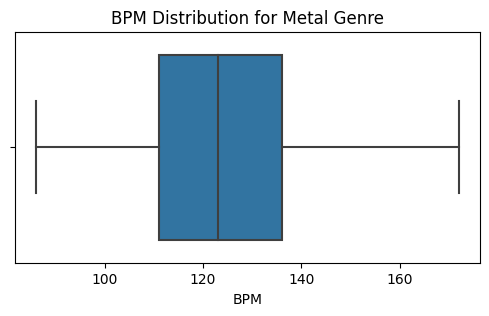

In [17]:
# box plot to visualize the distribution of BPM
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_metal, x='BPM')
plt.title("BPM Distribution for Metal Genre")
plt.show()

**Insight**

- The mean BPM for the metal songs in the dataset is 124 BPM. This could be indicative of the typical tempo range for a metal music.
- The calculated lower bound of 73.5 BPM and the upper bound of 173.5 BPM result in a substantial range. So far, this range is the largest among the analyzed genres, indicating the extensive variability in tempo within the "Metal" genre.
- The absence of outliers and the wide yet well-contained range of BPM values may reflect the consistency and established conventions within the "Metal" genre. While the tempo can vary significantly, it remains within a certain framework, maintaining the genre's characteristic sound and feel.

#### **Key Distribution**

In [18]:
# key distribution
key_metal = df_metal['Key'].value_counts().reset_index()
key_metal

,Key,count
0,A,22
1,B,10
2,F#,10
3,D#,10
4,E,9
5,G,8
6,D,8
7,G#,7
8,C#,6
9,A#,6


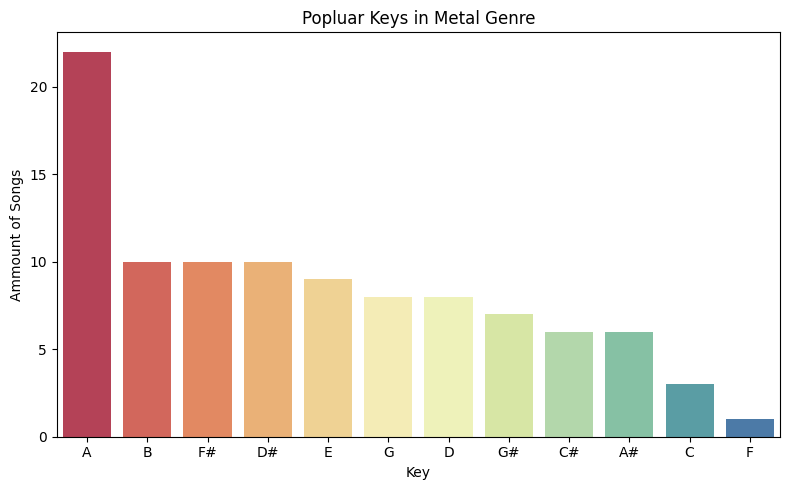

In [19]:
# bar plot to visualize the key distribution
plt.figure(figsize=(8, 5))

sns.barplot(x='Key', y='count', data=key_metal, palette='Spectral')
plt.title('Popluar Keys in Metal Genre')
plt.xlabel('Key')
plt.ylabel('Ammount of Songs')
plt.tight_layout()

plt.show()

**Insight**
- The data reveals that the key of A is the most popular in the "Metal" genre, with 22 songs in this key. This suggests that the key of A complements the heavy and powerful nature of the genre. 
- This is a notable finding, especially considering that the same key (A) is also popular in the "Rock" genre. The shared popularity of the A key in both genres suggests that A is a key with characteristics that resonate with the energy, intensity, and sonic palette of rock and metal music.

### **Disco**

In [20]:
# Function to detect the key of an audio file
def detect_key(audio_file_path):
    y, sr = librosa.load(audio_file_path)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_mean = chroma.mean(axis=1)
    key_index = chroma_mean.argmax()
    keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    detected_key = keys[key_index]
    return detected_key

# Function to get the BPM of an audio file
def get_bpm(audio_file):
    y, sr = librosa.load(audio_file)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    return tempo

# Function to process files in a folder, including key detection
def process_files_in_folder(folder_path):
    data = {'File Name': [], 'BPM': [], 'Key': [], 'Genre': []}
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            audio_file = os.path.join(folder_path, filename)
            bpm = get_bpm(audio_file)
            key = detect_key(audio_file)

            data['File Name'].append(filename)
            data['BPM'].append(bpm.round())
            data['Key'].append(key)
            data['Genre'].append('Disco')

    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    folder_path = "GTZAN Dataset - Music Genre Classification/Data/genres_original/disco"
    df_disco = process_files_in_folder(folder_path)

#### **BPM Distribution**

In [21]:
# typical tempo
df_disco['BPM'].mean()

119.88

In [22]:
# calculate lower and upper bounds
Q1 = df_disco['BPM'].quantile(0.25)
Q3 = df_disco['BPM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 86.5
Upper Bound: 154.5


In [23]:
df_disco.sort_values(by='BPM', ascending=False)

,File Name,BPM,Key,Genre
20,disco.00020.wav,161.0,B,Disco
41,disco.00041.wav,161.0,D,Disco
30,disco.00030.wav,136.0,B,Disco
72,disco.00072.wav,136.0,D,Disco
36,disco.00036.wav,136.0,F,Disco
...,...,...,...,...
91,disco.00091.wav,99.0,C,Disco
67,disco.00067.wav,99.0,A,Disco
11,disco.00011.wav,96.0,A,Disco
13,disco.00013.wav,89.0,E,Disco


In [24]:
# outliers
df_disco.sort_values(by='BPM',ascending=False).head(2)

,File Name,BPM,Key,Genre
20,disco.00020.wav,161.0,B,Disco
41,disco.00041.wav,161.0,D,Disco


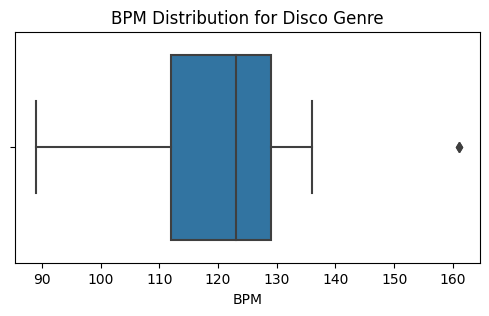

In [25]:
# Create a box plot to visualize the distribution of BPM
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_disco, x='BPM')
plt.title("BPM Distribution for Disco Genre")
plt.show()

**Insight**

- The "Disco" genre shows a mean BPM of 120, which is the same as the "Rock" genre. This commonality in mean BPM suggests that, despite being distinct musical genres, both "Disco" and "Rock" have songs with a similar tempo, around 120 BPM. This may be a surprising finding, as "Disco" is typically associated with dance and groove, while "Rock" is known for its intensity and aggression.
- The calculated lower bound of 86.5 BPM and the upper bound of 154.5 BPM result in a relatively narrow range. This is the lowest range observed among the analyzed genres. The limited range indicates that "Disco" music is characterized by a consistent tempo and may not exhibit as much variability in tempo as other genres.
- Despite the narrow range, the data includes two outliers with a BPM of 161. These outliers suggest that there are "Disco" songs with tempos significantly higher than the majority data from the dataset. The outliers are:
    * disco.00020 = Patches by Clarence Carter
    * disco.00041 = Always and Forever by Heatwave 

#### **Key Distribution**

In [26]:
# key distribution
key_disco = df_disco['Key'].value_counts().reset_index()
key_disco

,Key,count
0,C,15
1,E,14
2,G,12
3,F,11
4,D,10
5,A,9
6,F#,8
7,D#,6
8,G#,5
9,A#,4


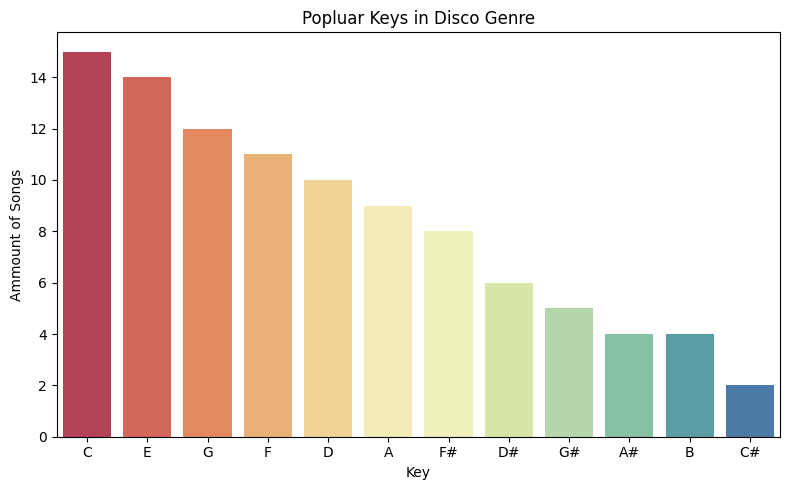

In [27]:
# bar plot to visualize the key distribution
plt.figure(figsize=(8, 5))

sns.barplot(x='Key', y='count', data=key_disco, palette='Spectral')
plt.title('Popluar Keys in Disco Genre')
plt.xlabel('Key')
plt.ylabel('Ammount of Songs')
plt.tight_layout()

plt.show()

**Insight**
- While the "Disco" genre features a variety of key choices, the most popular keys are C and E, with counts of 15 and 14, respectively. The selection of these keys combiend with the BPM range of disco music, may align with the genre's emphasis on danceability and groovy rhythms.

### **Pop** 

In [28]:
# Function to detect the key of an audio file
def detect_key(audio_file_path):
    y, sr = librosa.load(audio_file_path)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_mean = chroma.mean(axis=1)
    key_index = chroma_mean.argmax()
    keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    detected_key = keys[key_index]
    return detected_key

# Function to get the BPM of an audio file
def get_bpm(audio_file):
    y, sr = librosa.load(audio_file)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    return tempo

# Function to process files in a folder, including key detection
def process_files_in_folder(folder_path):
    data = {'File Name': [], 'BPM': [], 'Key': [], 'Genre': []}
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            audio_file = os.path.join(folder_path, filename)
            bpm = get_bpm(audio_file)
            key = detect_key(audio_file)

            data['File Name'].append(filename)
            data['BPM'].append(bpm.round())
            data['Key'].append(key)
            data['Genre'].append('Pop')

    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    folder_path = "GTZAN Dataset - Music Genre Classification/Data/genres_original/pop"
    df_pop = process_files_in_folder(folder_path)

#### **BPM Distribution**

In [29]:
# typical tempo
df_pop['BPM'].mean()

113.7

In [30]:
# calculate lower and upper bounds
Q1 = df_pop['BPM'].quantile(0.25)
Q3 = df_pop['BPM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 60.75
Upper Bound: 162.75


In [31]:
df_pop.sort_values(by='BPM', ascending=False)

,File Name,BPM,Key,Genre
8,pop.00008.wav,172.0,D#,Pop
99,pop.00099.wav,161.0,G#,Pop
29,pop.00029.wav,161.0,F#,Pop
94,pop.00094.wav,152.0,A#,Pop
26,pop.00026.wav,152.0,A,Pop
...,...,...,...,...
56,pop.00056.wav,89.0,G#,Pop
59,pop.00059.wav,89.0,G#,Pop
74,pop.00074.wav,83.0,C,Pop
39,pop.00039.wav,83.0,G#,Pop


In [32]:
# outliers
df_pop.sort_values(by='BPM',ascending=False).head(1)

,File Name,BPM,Key,Genre
8,pop.00008.wav,172.0,D#,Pop


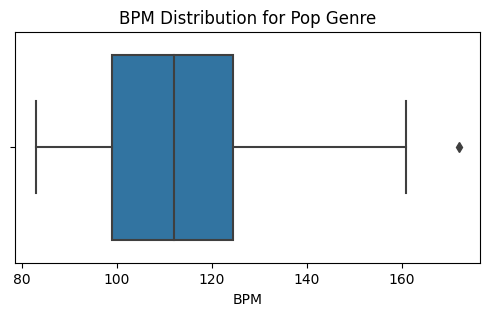

In [33]:
# visualize the distribution of BPM
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_pop, x='BPM')
plt.title("BPM Distribution for Pop Genre")
plt.show()

**Insight**
- The "Pop" genre exhibits the lowest mean BPM of 114 compared to the other analyzed genres. This suggests that pop music typically features songs with a relatively moderate tempo.
- The data includes one outlier with a BPM of 172, which exceeds the upper bound. This outlier suggests that there are "Pop" songs with faster tempos that deviate from the typical range. The outliere is:
    - pop.00008.wav = You Learn by Alanis morissette

#### **Key Distribution**

In [34]:
# key distribution
key_pop = df_pop['Key'].value_counts().reset_index()
key_pop

,Key,count
0,G,22
1,F,10
2,A,9
3,G#,9
4,F#,8
5,D#,8
6,C,7
7,B,6
8,D,6
9,A#,5


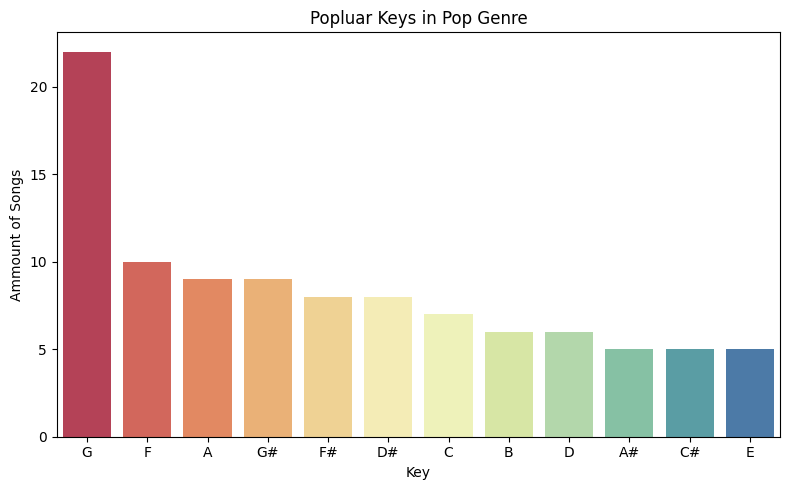

In [35]:
# bar plot to visualize the key distribution
plt.figure(figsize=(8, 5))

sns.barplot(x='Key', y='count', data=key_pop, palette='Spectral')
plt.title('Popluar Keys in Pop Genre')
plt.xlabel('Key')
plt.ylabel('Ammount of Songs')
plt.tight_layout()

plt.show()

**Insight**
- The data reveals that the key of G is the most popular in the "Pop" genre, with a count of 22 songs. This dominance of the G key suggests that it holds a special place in the genre The prevalence of the G key might also have a significant influence on the overall sound and character of "Pop" music.

## **Analyze Key From All Genres**
We will merge data frames from each genre, to analyze what keys are most frequently used in the four `genres based on the dataset.

In [36]:
df_result = pd.concat([df_disco,df_pop,df_rock,df_metal])

In [37]:
# key distribution in every songs
key_counts = df_result['Key'].value_counts().reset_index()
key_counts

,Key,count
0,A,59
1,G,54
2,C,38
3,D,38
4,E,36
5,F#,31
6,F,30
7,D#,29
8,G#,25
9,B,24


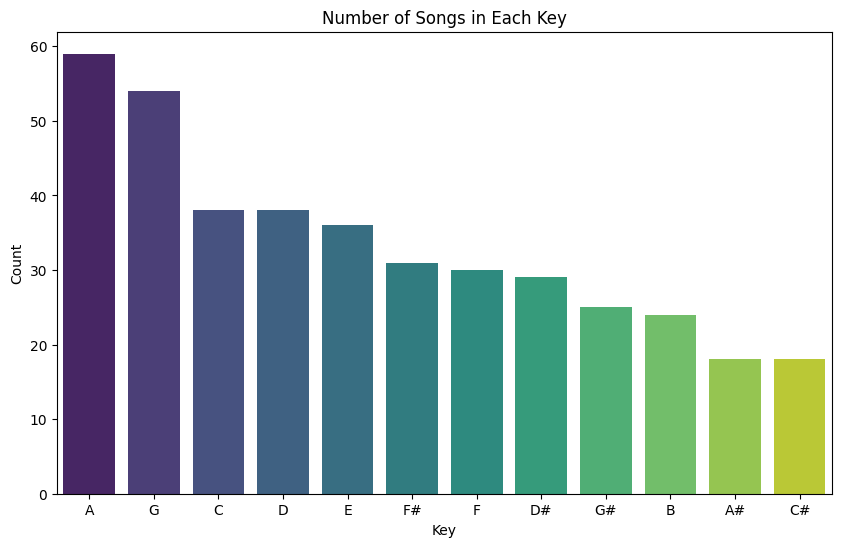

In [38]:
# visualize number of songs in each key
plt.figure(figsize=(10, 6))
sns.barplot(x='Key', y='count', data=key_counts, palette='viridis')
plt.title('Number of Songs in Each Key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

**Insight**
- The data shows that the keys of A and G are the most popular across these genres, with 59 and 54 counts, respectively.
- All the keys in the existing list are utilized within the analyzed music genre (rock, metal, disco, and pop). The diversity in key choices within each genre reflects the genre's distinct sonic identity and style.

In [39]:
# count the number of songs in the G key by genre
df_keyg = df_result[df_result['Key'] == 'G']['Genre'].value_counts().reset_index()
df_keyg

,Genre,count
0,Pop,22
1,Disco,12
2,Rock,12
3,Metal,8


In [40]:
# count the number of songs in the A key by genre
df_keya = df_result[df_result['Key'] == 'A']['Genre'].value_counts().reset_index()
df_keya

,Genre,count
0,Metal,22
1,Rock,19
2,Disco,9
3,Pop,9


In [41]:
# count the number of songs in the C key by genre
df_keyc = df_result[df_result['Key'] == 'C']['Genre'].value_counts().reset_index()
df_keyc

,Genre,count
0,Disco,15
1,Rock,13
2,Pop,7
3,Metal,3


In [42]:
# count the number of songs in the F key by genre
df_keyf = df_result[df_result['Key'] == 'F']['Genre'].value_counts().reset_index()
df_keyf

,Genre,count
0,Disco,11
1,Pop,10
2,Rock,8
3,Metal,1


In [43]:
# count the number of songs in the E key by genre
df_keye = df_result[df_result['Key'] == 'E']['Genre'].value_counts().reset_index()
df_keye

,Genre,count
0,Disco,14
1,Metal,9
2,Rock,8
3,Pop,5


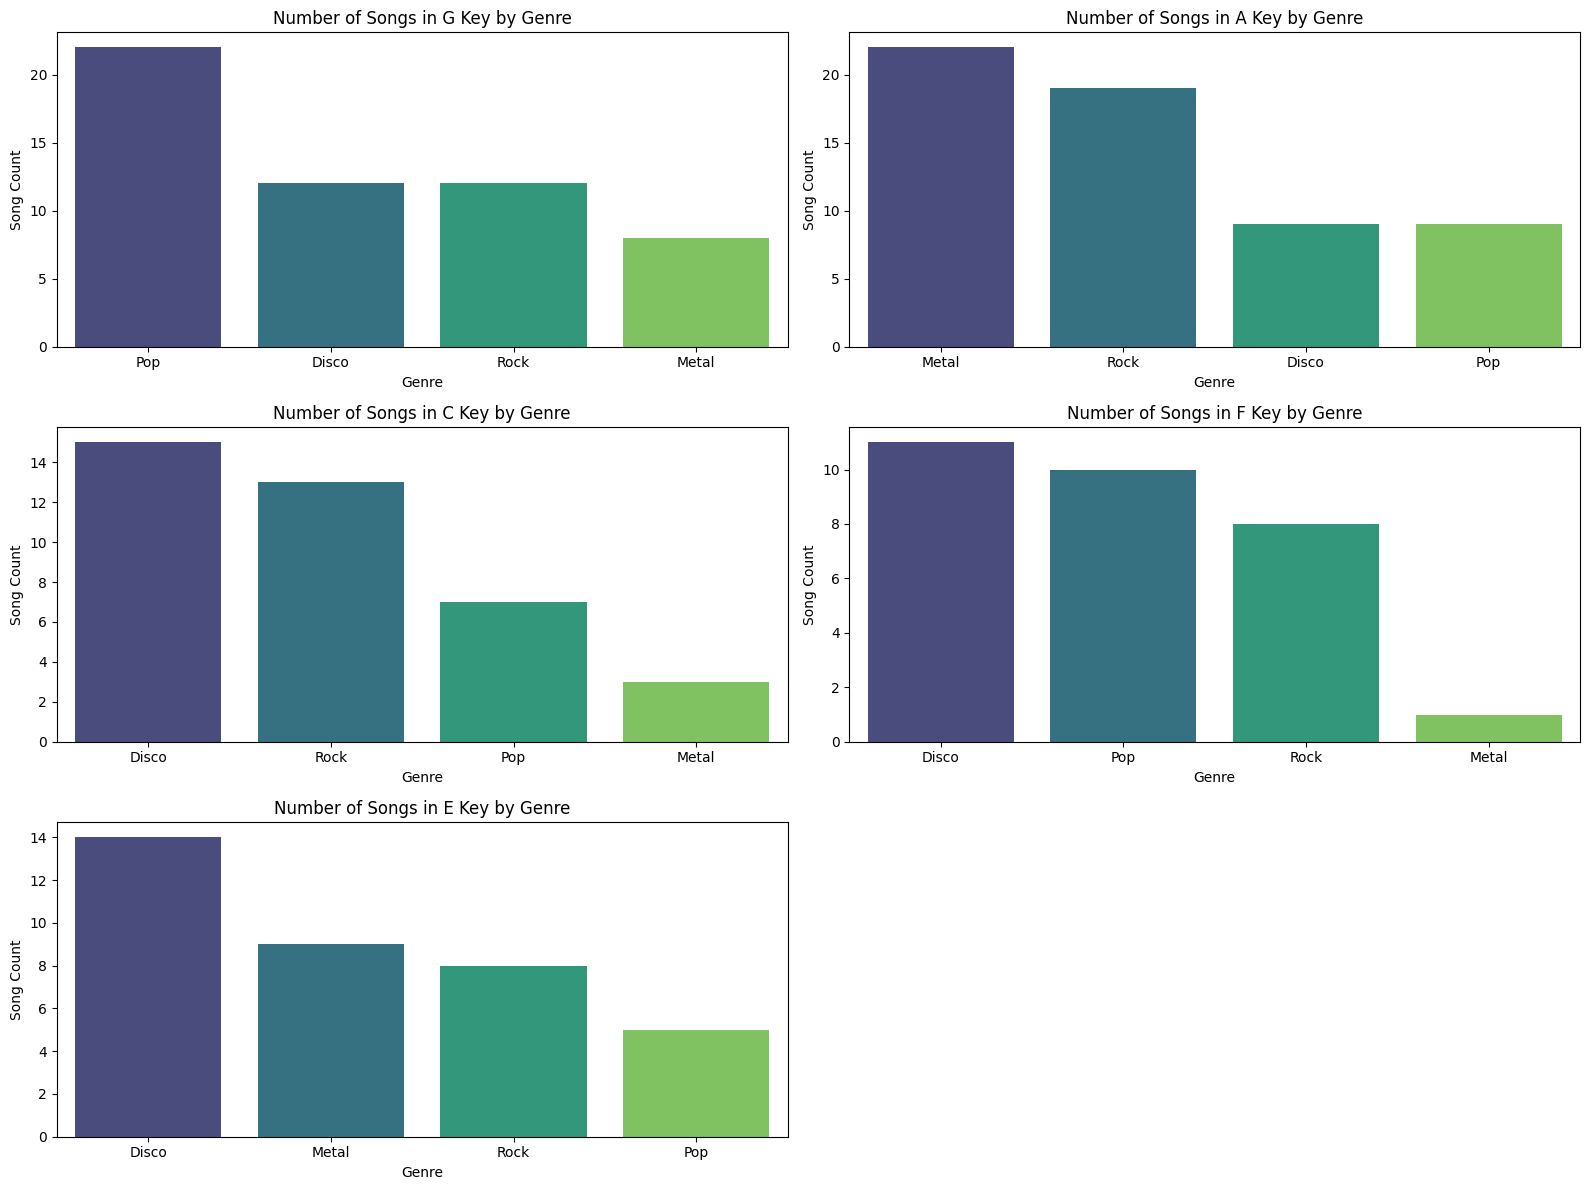

In [44]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
bar = sns.barplot(x='Genre', y='count', data=df_keyg, palette='viridis')
plt.title('Number of Songs in G Key by Genre')
plt.xlabel('Genre')
plt.ylabel('Song Count')

plt.subplot(3, 2, 2)
bar = sns.barplot(x='Genre', y='count', data=df_keya, palette='viridis')
plt.title('Number of Songs in A Key by Genre')
plt.xlabel('Genre')
plt.ylabel('Song Count')

plt.subplot(3, 2, 3)
bar = sns.barplot(x='Genre', y='count', data=df_keyc, palette='viridis')
plt.title('Number of Songs in C Key by Genre')
plt.xlabel('Genre')
plt.ylabel('Song Count')

plt.subplot(3, 2, 4)
bar = sns.barplot(x='Genre', y='count', data=df_keyf, palette='viridis')
plt.title('Number of Songs in F Key by Genre')
plt.xlabel('Genre')
plt.ylabel('Song Count')

plt.subplot(3, 2, 5)
bar = sns.barplot(x='Genre', y='count', data=df_keye, palette='viridis')
plt.title('Number of Songs in E Key by Genre')
plt.xlabel('Genre')
plt.ylabel('Song Count')

plt.tight_layout()
plt.show()

**Insight**
- The key 'G' is most popularly used in the "Pop" genre, with 22 songs. Pop music often aims for broad appeal, and the choice of 'G' might contribute to creating catchy and relatable tunes.
- The key 'A' is prominently featured in both the "Metal" and "Rock" genres, with 22 and 19 songs, respectively. The use of 'A' aligns with the energetic and often aggressive qualities of these genres.
- The key 'C' is favored in the "Disco" genre, with 15 songs. 'C' is also used in the "Rock" and "Pop" genres, but it's less prevalent, showing a level of versatility and adaptability across genres.
- The key 'F' is commonly used in the "Disco" genre, with 11 songs. The key 'F' is also a preferred choice in the "Pop" genre, with 10 songs. This suggests that 'F' may have qualities that contribute to creating the upbeat and danceable vibes
- The key 'E' is popular in the "Disco" genre, with 14 songs, and is also used in the "Metal" genre, with 9 songs. This indicates that 'E' can adapt to different musical styles. In "Disco," it contributes to the danceable nature of the genre, while in "Metal," it may be employed for creating intense and heavy compositions.